# Analyzing Movie Reviews

## Source Details
Source data fandango_score_comparison.csv is originally from  FiveThirtyEight. It contains information on how major movie review services rated movies.Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie

In [2]:
import pandas as pd
movies= pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

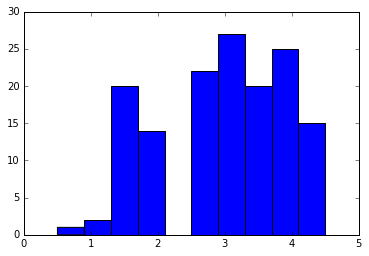

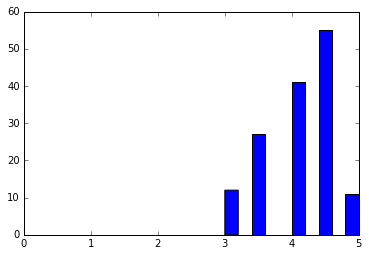

In [8]:
plt.hist(movies["Metacritic_norm_round"])
plt.xlim(0,5)
plt.show()
plt.hist(movies["Fandango_Stars"])
plt.xlim(0,5)
plt.show()

Metacritic ratings scattered from 1 to 5, whereas Fandango ratings are mostly between 3 and 5. Meaning, No moviews are rated low by Fandango.

In [22]:
metacritic_mean=movies["Metacritic_norm_round"].mean()
fandango_mean=movies["Fandango_Stars"].mean()

metacritic_median=movies["Metacritic_norm_round"].median()
fandango_median=movies["Fandango_Stars"].median()

metacritic_std=movies["Metacritic_norm_round"].std()
fandango_std=movies["Fandango_Stars"].std()

In [28]:
print("metacritic_mean={}".format(metacritic_mean))
print("fandango_mean={}".format(fandango_mean))
print("metacritic_median={}".format(metacritic_median))
print("fandango_median={}".format(fandango_median))
print("metacritic_std={}".format(metacritic_std))
print("fandango_std={}".format(fandango_std))

metacritic_mean=2.9726027397260273
fandango_mean=4.089041095890411
metacritic_median=3.0
fandango_median=4.0
metacritic_std=0.9909605613743359
fandango_std=0.5403859779787334


Found in a   2015 controversy that Fandango has a conflict of interest as a ticket-selling platform - higher ratings may drive more sales.Moreover, metacritic is based on professional reviews but fandango is based on user reviews. This would make the difference with the ratings.

Mean of metacritic is lower than the median,as there are few lower values. But the mean of fandango is higher than the median because there are large values.Most of the Fandango values are around the mean with minimal deviation, hence the standard deviation is lesser in Fandango.

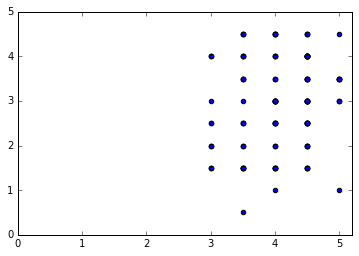

In [32]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
plt.xlim(0,5.2)
plt.show()

In [35]:
movies["fm_diff"]=abs(movies["Metacritic_norm_round"]-movies["Fandango_Stars"])

In [50]:
movies.sort_values("fm_diff",ascending=False).head(5)[["FILM","Metacritic_norm_round","Fandango_Stars"]]

,FILM,Metacritic_norm_round,Fandango_Stars
3,Do You Believe? (2015),1.0,5.0
85,Little Boy (2015),1.5,4.5
47,Annie (2014),1.5,4.5
19,Pixels (2015),1.5,4.5
134,The Longest Ride (2015),1.5,4.5


The moview "Do You Believe? (2015)" has a contradict ratings. 1.0 Rating from Meta and 5 from Fandango which is total opposite.

In [53]:
from scipy.stats import pearsonr,linregress

In [56]:
r_value,p_value=pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

In [59]:
print(r_value)
print(p_value)


0.17844919073895918
0.031161516228523815


r-value of 0.178 shows there IS a weak positive correlation between 
Metacritic and Fandango ratings.

The p-value of 0.031 (< 0.05) indicates this correlation is statistically 
significant - meaning it's unlikely to be due to random chance.

Therefore: Metacritic and Fandango ratings ARE correlated with each other, 
but the relationship is WEAK.

In [61]:
linear_regression=linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

In [62]:
print(linear_regression)

LinregressResult(slope=0.09731107797392827, intercept=3.799773918899419, rvalue=0.17844919073895882, pvalue=0.031161516228524384, stderr=0.04471354465679829)


In [64]:
predicted_Fandango=linear_regression.slope*3.0 + linear_regression.intercept

In [65]:
print(predicted_Fandango)

4.091707152821204


If 3.0 is the Metacritic rating, then it is redicted that 4.09 would be fandango rating as per linear regression model.

In [68]:
predicted_Fandango_1=linear_regression.slope*1.0 + linear_regression.intercept
predicted_Fandango_5=linear_regression.slope*5.0 + linear_regression.intercept

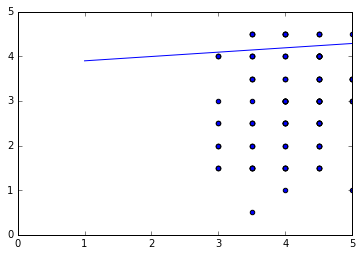

In [70]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
plt.plot([1.0, 5.0],[predicted_Fandango_1,predicted_Fandango_5])
plt.xlim(0,5)
plt.show()